# Loading and Cleaning Data

In [1]:
import pandas as pd

text = pd.read_csv('text_final.csv')
audio = pd.read_csv('df_new.csv')
image = pd.read_csv('mustard++/Facial-Expression-Recognition.Pytorch-master/dependant_image_embeddings.csv')
labels = pd.read_csv('labels_final.csv')

text = text.iloc[:,:-27]

# Filter rows where 'file_name' contains '.wav' once
filtered_audio = audio[audio['file_name'].str.count('.wav') == 1]
filtered_audio['SCENE'] = filtered_audio['file_name'].str.rsplit('_', 1).str[0]
filtered_audio.drop('file_name', inplace=True, axis=1)

image['SCENE'] = image['ImageName'].str.rsplit('_', 1).str[0]
image.drop('ImageName', inplace=True, axis=1)

merged_df = filtered_audio.merge(text, on='SCENE', how='inner')
merged_df = merged_df.merge(image, on='SCENE', how='inner')

multimodal_df = merged_df.dropna()

merged_df = pd.merge(multimodal_df, labels, on='SCENE', how='left')
merged_df.drop(columns=['SCENE'], inplace=True)

X = merged_df.drop(columns=['Sarcasm_y'])
y = merged_df['Sarcasm_y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

C:\Users\vijet\AppData\Local\Temp\ipykernel_20572\1836421241.py:12: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  filtered_audio['SCENE'] = filtered_audio['file_name'].str.rsplit('_', 1).str[0]
C:\Users\vijet\AppData\Local\Temp\ipykernel_20572\1836421241.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_audio['SCENE'] = filtered_audio['file_name'].str.rsplit('_', 1).str[0]
C:\Users\vijet\AppData\Local\Temp\ipykernel_20572\1836421241.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

# Neural Network

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers, callbacks

# Neural Network Model
model = models.Sequential()

# Input layer
model.add(layers.Dense(256, activation='relu', input_shape=(1153,), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))


model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=300, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

# Model evaluation
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 1/300
25/25 [==============================] - 1s 12ms/step - loss: 9.4392 - accuracy: 0.5182 - val_loss: 2.2850 - val_accuracy: 0.5855 - lr: 0.0010
Epoch 2/300
25/25 [==============================] - 0s 5ms/step - loss: 4.5999 - accuracy: 0.5130 - val_loss: 1.7947 - val_accuracy: 0.4197 - lr: 0.0010
Epoch 3/300
25/25 [==============================] - 0s 6ms/step - loss: 3.1513 - accuracy: 0.5000 - val_loss: 1.1350 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 4/300
25/25 [==============================] - 0s 5ms/step - loss: 2.4903 - accuracy: 0.4974 - val_loss: 1.1534 - val_accuracy: 0.5130 - lr: 0.0010
Epoch 5/300
25/25 [==============================] - 0s 5ms/step - loss: 2.2293 - accuracy: 0.5052 - val_loss: 1.0522 - val_accuracy: 0.5596 - lr: 0.0010
Epoch 6/300
25/25 [==============================] - 0s 5ms/step - loss: 1.8825 - accuracy: 0.4792 - val_loss: 1.0363 - val_accuracy: 0.5337 - lr: 0.0010
Epoch 7/300
25/25 [==============================] - 0s 5ms/step - loss: 1.

Epoch 54/300
25/25 [==============================] - 0s 6ms/step - loss: 0.8741 - accuracy: 0.5143 - val_loss: 0.8625 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 55/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8696 - accuracy: 0.5273 - val_loss: 0.8616 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 56/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8614 - accuracy: 0.5286 - val_loss: 0.8610 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 57/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8677 - accuracy: 0.5130 - val_loss: 0.8602 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 58/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8619 - accuracy: 0.5286 - val_loss: 0.8590 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 59/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8664 - accuracy: 0.5065 - val_loss: 0.8579 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 60/300
25/25 [==============================] - 0s 5ms/step - lo

Epoch 107/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8200 - accuracy: 0.5364 - val_loss: 0.8168 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 108/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8237 - accuracy: 0.5143 - val_loss: 0.8158 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 109/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8220 - accuracy: 0.5260 - val_loss: 0.8150 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 110/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8236 - accuracy: 0.5247 - val_loss: 0.8141 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 111/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8206 - accuracy: 0.5208 - val_loss: 0.8130 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 112/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8225 - accuracy: 0.5156 - val_loss: 0.8119 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 113/300
25/25 [==============================] - 0s 5ms/st

25/25 [==============================] - 0s 5ms/step - loss: 0.7449 - accuracy: 0.5208 - val_loss: 0.7395 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 212/300
25/25 [==============================] - 0s 5ms/step - loss: 0.7443 - accuracy: 0.5208 - val_loss: 0.7391 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 213/300
25/25 [==============================] - 0s 5ms/step - loss: 0.7437 - accuracy: 0.5208 - val_loss: 0.7388 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 214/300
25/25 [==============================] - 0s 5ms/step - loss: 0.7431 - accuracy: 0.5208 - val_loss: 0.7379 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 215/300
25/25 [==============================] - 0s 5ms/step - loss: 0.7425 - accuracy: 0.5208 - val_loss: 0.7370 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 216/300
25/25 [==============================] - 0s 5ms/step - loss: 0.7418 - accuracy: 0.5208 - val_loss: 0.7364 - val_accuracy: 0.5803 - lr: 0.0010
Epoch 217/300
25/25 [==============================] - 0s 5ms/step - loss: 0.7

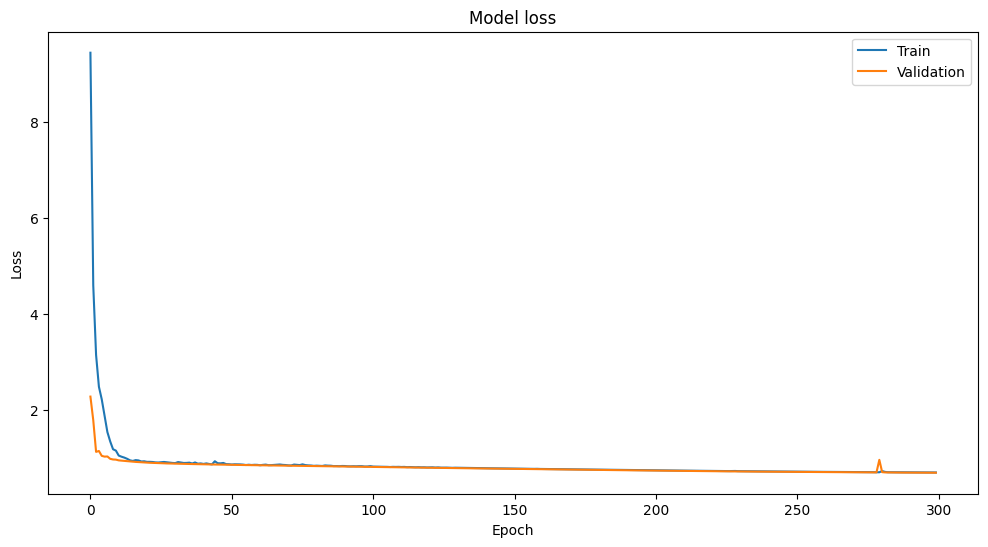

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#### Observation: Very poor performance

# Display Metric Function

In [2]:
def display_metrics(y_tes,y_pre):
    # Calculate metrics
    accuracy = accuracy_score(y_tes, y_pre)
    precision = precision_score(y_tes, y_pre)
    recall = recall_score(y_tes, y_pre)
    f1 = f1_score(y_tes, y_pre)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)

y_pred_rf = grid_rf.predict(X_test)

# Display metrics for XGBoost
print("RF Metrics:")
display_metrics(y_test, y_pred_rf)

Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
RF Metrics:
Accuracy: 0.8037383177570093
Precision: 0.7631578947368421
Recall: 0.9508196721311475
F1 Score: 0.8467153284671532


# XGBoost

In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xg = xgb.XGBClassifier()
param_grid_xg = {
    'n_estimators': [50, 75],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2],
    'subsample': [0.7,0.8],
    'colsample_bytree': [0.7,0.8]
}

grid_xg = GridSearchCV(estimator=xg, param_grid=param_grid_xg, cv=5, n_jobs=-1)
grid_xg.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_xg.best_params_)

y_pred_xg = grid_xg.predict(X_test)

# Display metrics for XGBoost
print("XGBoost Metrics:")
display_metrics(y_test, y_pred_xg)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 75, 'subsample': 0.8}
XGBoost Metrics:
Accuracy: 0.897196261682243
Precision: 0.8787878787878788
Recall: 0.9508196721311475
F1 Score: 0.9133858267716536


In [14]:
y_pred_xg = grid_xg.predict(X_train)

# Display metrics for XGBoost
print("XGBoost Metrics:")
display_metrics(y_train, y_pred_xg)

XGBoost Metrics:
Accuracy: 0.960539979231568
Precision: 0.9523809523809523
Recall: 0.9746588693957114
F1 Score: 0.9633911368015414


# SVM

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm = SVC(probability=True)  # 'probability=True' to ensure you can retrieve probabilities
param_grid_svm = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_svm.best_params_)

y_pred_svm = grid_svm.predict(X_test)

# Display metrics for SVM
print("SVM Metrics:")
display_metrics(y_test, y_pred_svm)


Best Parameters for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
SVM Metrics:
Accuracy: 0.6915887850467289
Precision: 0.7333333333333333
Recall: 0.7213114754098361
F1 Score: 0.7272727272727273


#### Observation: XGBoost is outperforming other models by a large margin. Let's check for overfit and tune accordingly

In [15]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the best parameters to train the XGBoost model
best_params_xgb = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 2,
    'n_estimators': 10,
    'subsample': 0.8
}

xgb_best = xgb.XGBClassifier(**best_params_xgb)
xgb_best.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred_best_xgb = xgb_best.predict(X_test)

# Display metrics for XGBoost
print("Best XGBoost Model Metrics:")
display_metrics(y_test, y_pred_best_xgb)


Best XGBoost Model Metrics:
Accuracy: 0.8598130841121495
Precision: 0.8709677419354839
Recall: 0.8852459016393442
F1 Score: 0.8780487804878049


In [16]:
# Predict on the test set using the best model
y_pred_best_xgb = xgb_best.predict(X_train)

# Display metrics for XGBoost
print("Best XGBoost Model Metrics:")
display_metrics(y_train, y_pred_best_xgb)


Best XGBoost Model Metrics:
Accuracy: 0.8660436137071651
Precision: 0.8794466403162056
Recall: 0.8674463937621832
F1 Score: 0.8734052993130521


#### Observation: With the above parameters, XGBoost model performs best with no overfit

# Saving XGBoost Model

In [17]:
import pickle

# Specify a path
model_filename_xgb = 'independant_fusion_model.pkl'

# Save the model to the file
with open(model_filename_xgb, 'wb') as model_file:
    pickle.dump(xgb_best, model_file)